# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

The new format for the SAT was released in March 2016. College Board wants recommendation where money is best spent to improve **SAT** participation rates for a state of our choice. We are provided with data sets that give average SAT and ACT scores by state, as well as participation rates, for the graduating class of 2017/18.

With the data interpreted and outside research, we will come to a conclusion for a state of our choice and give recommendations to improve **SAT** participation rate.  


## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [3]:
# pandas for dataframe analysis tools
import pandas as pd
# numpy for working with arrays
import numpy as np
# for plotting and data visualisations 
import matplotlib.pyplot as plt
import seaborn as sns

# Import scipy.stats for hypothesis testing 
from scipy import stats

# to store plots directly in the notebook
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [4]:
#Code:
sat_df_2017 = pd.read_csv('../data/sat_2017.csv')
act_df_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code:

sat_df_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [6]:
act_df_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [7]:
sat_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
act_df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


Answer: 
- The participation rate greatly differs for each states especially for SAT exams (range 3 to 100%) and ACT (18% to 100%).
- States with higher average score have much lower participation rate:
    SAT - 1200+ for Arkanas (3%) and Colorado (11%)
    ACT - 24+ for Connecticut (31%), Delaware (18%) and District of Columbia (32%)
- Common topics between SAT and (ACT):  
    Math: (Math) 
    Evidence-Based Reading and Writing: (English, Reading, Science).

#### 4a. Does the data look complete? 

Answer:
Complete but without sufficient data to make a good analysis (etc. Current budget from Government supporting Schools, ratio of State population with Number of schools in state) 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
The act_df_2017 contains a state called "National" which is not a state and should be removed. 

The act_df_2017 state Maryland has a ACT science score of 2.3 which should be corrected to **23.2**

The sat_df_2017 state Maryland has a SAT math score of 52 which should be corrected to **524**



Minimum possible value for SAT is 200 for each subject. Minimum total of 400.
Maximum possible value for SAT is 800 for each subject. Maximum total of 1600.
Minimum possible value for ACT is 1 for each subject. Minimum composite of 1.
Maximum possible value for ACT is 36 for each subject. Maximum composite of 36.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
# to remove row 0 for act_df_2017
act_df_2017.drop(0, inplace=True)
# act_df_2017 state Maryland has a ACT science score of 2.3 which should be corrected to 23.2 
act_df_2017.at[21, 'Science'] = float(23.2)
# sat_df_2017 state Maryland has a SAT math score of 52 which should be corrected to **524**
sat_df_2017.at[20, 'Math'] = int(524)

#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
sat_df_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
act_df_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
act_df_2017 column "Composite" is Dtype ojbect which is odd as it is the average of the scores the 4 topics and should be float64.

Also both df participation rate should be integer.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
# change act_df_2017 column "Composite" from object to float
# change both participation rate column from object to int

def to_float(x):
    """To change dtype to float and if there are exceptions to raise as TypeError."""
    try:
        out = float(x)
    except:
        raise TypeError("Only floats are allowed")
    return out

def to_int(x):
    """To change dtype to integer and if there are exceptions to raise as TypeError."""
    try:
        out = int(x)
    except:
        raise TypeError("Only integers are allowed")
    return out

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#to change act_df_2017['Composite'][-1:] value from 20.2x to 20.2
act_df_2017.at[51, 'Composite'] = float(20.2)

In [14]:
act_df_2017['Participation'] = act_df_2017['Participation'].str.replace("%", "") #<--- remove % from ACT participation rate

In [15]:
sat_df_2017['Participation']=sat_df_2017['Participation'].str.replace("%", "") #<--- remove % from SAT participation rate

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
act_df_2017['Composite'] = act_df_2017['Composite'].apply(to_float) # <--- apply Composite column in ACT to float

In [17]:
act_df_2017['Participation'] = act_df_2017['Participation'].apply(to_int) # <--- apply Participation column in ACT to int

In [18]:
sat_df_2017['Participation'] = sat_df_2017['Participation'].apply(to_int) # <--- apply Participation column in SAT to int

- Display the data types again to confirm they are correct.

In [19]:
#Code:
sat_df_2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [20]:
act_df_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
act_df_2017.rename(columns={
    'State': 'state',
    'Participation': 'act_participation_2017',
    'English': 'act_english_2017',
    'Math': 'act_math_2017',
    'Reading': 'act_reading_2017',
    'Science': 'act_science_2017',
    'Composite': 'act_finalscore_2017'
                   }, inplace = True)

In [22]:
sat_df_2017.rename(columns={
    'State': 'state',
    'Participation': 'sat_participation_2017',
    'Evidence-Based Reading and Writing': 'sat_english_reading_science_2017',
    'Math': 'sat_math_2017',
    'Total': 'sat_finalscore_2017',
                   }, inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|sat/act_df_2017/18|The states that are participating in the respective exams| 
|**sat/act_participation_2017/18**|*integer*|sat/act_df_2017/18|The participation rate of each state (in %)| 
|**sat_english_reading_science_2017/18**|*integer*|sat_df_2017/18|The SAT score for the section under Evidence-Based Reading and Writing (200 - 800)| 
|**sat_math_2017/18**|*integer*|sat_df_2017/18|The SAT score for the section under Math (200 - 800)| 
|**sat_finalscore_2017/18**|*integer*|sat_df_2017/18|The average total score of SAT exam (400 - 1600)| 
|**act_english_2017/18**|*float*|act_df_2017/18|The ACT score for the section under English (1.00 - 36.00)|
|**act_math_2017/18**|*float*|act_df_2017/18|The ACT score for the section under Math (1.00 - 36.00)|
|**act_reading_2017/18**|*float*|act_df_2017/18|The ACT score for the section under Reading (1.00 - 36.00)|
|**act_science_2017/18**|*float*|act_df_2017/18|The ACT score for the section under Science (1.00 - 36.00)|
|**act_finalscore_2017/18**|*float*|act_df_2017/18|The total average score of ACT exam (1.00 - 36.00)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
# The act_df_2017 contains a state called "National" which is not a state and should be removed.
# It has been identified in point 4c 
# act_df_2017.drop(0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [24]:
# Merging the 2 dataframes and assigning a variable
combined_2017 = pd.merge(sat_df_2017, act_df_2017)
combined_2017.head()

,state,sat_participation_2017,sat_english_reading_science_2017,sat_math_2017,sat_finalscore_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_finalscore_2017
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [25]:
combined_2017.to_csv('../data/combined_2017.csv', sep=',') #<--- to export file in ',' delimited

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [26]:
# Read in the .csv files and giving them appropriate names
sat_df_2018 = pd.read_csv('../data/sat_2018.csv')
act_df_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [27]:
# check data for any discrepancies
sat_df_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [28]:
# check data for any discrepancies
act_df_2018.head(5)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [29]:
# remove % from participation column
sat_df_2018['Participation'] = sat_df_2018['Participation'].str.replace("%", "")

In [30]:
# apply Participation column in SAT to integer dtype
sat_df_2018['Participation'] = sat_df_2018['Participation'].apply(to_int)

In [31]:
sat_df_2018.dtypes # checking data type for any discrepancies

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [32]:
act_df_2018.dtypes # checking data type for any discrepancies

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [33]:
# rename the columns to appropriate names 
act_df_2018.rename(columns={
    'State': 'state',
    'Percentage of Students Tested': 'act_participation_2018',
    'Average English Score': 'act_english_2018',
    'Average Math Score': 'act_math_2018',
    'Average Reading Score': 'act_reading_2018',
    'Average Science Score': 'act_science_2018',
    'Average Composite Score': 'act_finalscore_2018'
                   }, inplace = True)

In [34]:
# rename the columns to appropriate names 
sat_df_2018.rename(columns={
    'State': 'state',
    'Participation': 'sat_participation_2018',
    'Evidence-Based Reading and Writing': 'sat_english_reading_science_2018',
    'Math': 'sat_math_2018',
    'Total': 'sat_finalscore_2018',
                   }, inplace = True)

In [35]:
# rearranging the columns in act_df_2018
act_df_2018 = act_df_2018[['state', 'act_participation_2018', 'act_english_2018', 'act_math_2018', 'act_reading_2018',
                     'act_science_2018', 'act_finalscore_2018']]

In [36]:
sat_df_2018.head(5) # confirming the changes made and ensuring there are no further changes to be made

,state,sat_participation_2018,sat_english_reading_science_2018,sat_math_2018,sat_finalscore_2018
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [37]:
act_df_2018.head(5) # confirming the changes made and ensuring there are no further changes to be made

,state,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_finalscore_2018
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [38]:
# merge 2018 ACT and SAT file into combined_2018

combined_2018 = pd.merge(sat_df_2018, act_df_2018)
combined_2018.head(5)

,state,sat_participation_2018,sat_english_reading_science_2018,sat_math_2018,sat_finalscore_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_finalscore_2018
0,Alabama,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [39]:
# merge combined_2017 and combined_2018 into final.csv

final = pd.merge(combined_2017, combined_2018)
final.head(5)

,state,sat_participation_2017,sat_english_reading_science_2017,sat_math_2017,sat_finalscore_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_english_reading_science_2018,sat_math_2018,sat_finalscore_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_finalscore_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [40]:
# to export merged dataframe under data into .csv file
final.to_csv('../data/final.csv', sep = ',') #<--- to export file in ',' delimited

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [41]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_english_reading_science_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_finalscore_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_finalscore_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [42]:
def calc_std(column):
    """To replicate the standard deviation formula above into code and return with the standard deviation"""
    n = column.count()
    mean = sum(column)/n
    var = sum((v - mean) ** 2 for v in column.values) / n
    std = var**0.5
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [43]:
# Applying the standard deviation function above to each column in the dataframe
sd = {
    'sat_participation_2017': calc_std(final['sat_participation_2017']),
    'sat_english_reading_science_2017': calc_std(final['sat_english_reading_science_2017']),
    'sat_math_2017': calc_std(final['sat_math_2017']),
    'sat_finalscore_2017': calc_std(final['sat_finalscore_2017']),
    'act_participation_2017': calc_std(final['act_participation_2017']),
    'act_english_2017': calc_std(final['act_english_2017']),
    'act_math_2017': calc_std(final['act_math_2017']),
    'act_reading_2017': calc_std(final['act_reading_2017']),
    'act_science_2017': calc_std(final['act_science_2017']),
    'act_finalscore_2017': calc_std(final['act_finalscore_2017']),
    'sat_participation_2018': calc_std(final['sat_participation_2018']),
    'sat_english_reading_science_2018': calc_std(final['sat_english_reading_science_2018']),
    'sat_math_2018': calc_std(final['sat_math_2018']),
    'sat_finalscore_2018': calc_std(final['sat_finalscore_2018']),
    'act_participation_2018': calc_std(final['act_participation_2018']),
    'act_english_2018': calc_std(final['act_english_2018']),
    'act_math_2018': calc_std(final['act_math_2018']),
    'act_reading_2018': calc_std(final['act_reading_2018']),
    'act_science_2018': calc_std(final['act_science_2018']),
    'act_finalscore_2018': calc_std(final['act_finalscore_2018']),
    
}

In [44]:
sd # To show the output

{'sat_participation_2017': 34.92907076664508,
 'sat_english_reading_science_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_finalscore_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_finalscore_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_english_reading_science_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_finalscore_2018': 93.22742384464433,
 'act_participation_2018': 33.745194881997506,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'act_finalscore_2018': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [45]:
np.std(final) # To show numpy's standard deviation method

sat_participation_2017              34.929071
sat_english_reading_science_2017    45.216970
sat_math_2017                       46.657134
sat_finalscore_2017                 91.583511
act_participation_2017              31.824176
act_english_2017                     2.330488
act_math_2017                        1.962462
act_reading_2017                     2.046903
act_science_2017                     1.722216
act_finalscore_2017                  2.000786
sat_participation_2018              36.946619
sat_english_reading_science_2018    47.034610
sat_math_2018                       47.301946
sat_finalscore_2018                 93.227424
act_participation_2018              33.745195
act_english_2018                     2.422254
act_math_2018                        2.015707
act_reading_2018                     2.145892
act_science_2018                     1.851689
act_finalscore_2018                  2.085526
dtype: float64

Answer: No the standard deviations do not match up with the output from pandas describe. However it matches with the 'np.std' method from numpy. This is because the standard deviation calculated by pandas is the sampling standard deviation with the only exception of dividing by **n-1** instead of just **n**.

[Reference for pandas's std](https://www.geeksforgeeks.org/python-pandas-series-std/#:~:text=std()%20function%20return%20sample,changed%20using%20the%20ddof%20argument.)

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [46]:
final[['state','sat_participation_2017',]].sort_values(by = 'sat_participation_2017', ascending = False).head()

,state,sat_participation_2017
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


In [47]:
final[['state','sat_participation_2018',]].sort_values(by = 'sat_participation_2018', ascending = False).head(8)

,state,sat_participation_2018
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100
19,Maine,99
13,Illinois,99
39,Rhode Island,97


For SAT in 2017, the 5 highest participation rates are District of Columbia, Michigan, Connecticut, Delaware and New Hampshire.

For SAT in 2018, the 5 highest participation rates are Colorado, Connecticut, Delaware, Michigan and Idaho.

The states of Michigan, Connecticut and Delaware achieved 100% partcipation rate for both years.

In [48]:
final[['state','act_participation_2017',]].sort_values(by = 'act_participation_2017', ascending = False).head()

,state,act_participation_2017
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


In [49]:
final[['state','act_participation_2018',]].sort_values(by = 'act_participation_2018', ascending = False).head()

,state,act_participation_2018
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


For ACT in 2017, the 5 highest participation rates are Alabama, Kentucky, Wisconsin, Utah and Tennessee.

For ACT in 2018, the 5 highest participation rates are Alabama, Kentucky, Wisconsin, Utah and Tennessee.

As observed from the above tables, all 5 states achieved 100% participation rate in both years.

In [50]:
final[['state','sat_participation_2017',]].sort_values(by = 'sat_participation_2017', ascending = True).head()

,state,sat_participation_2017
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


In [98]:
final[['state','sat_participation_2018',]].sort_values(by = 'sat_participation_2018', ascending = True).head()

,state,sat_participation_2018
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


For SAT in 2017, the 5 lowest participation rates are North Dakota, Mississippi, Iowa, Missouri and Utah.

For SAT in 2018, the 5 lowest participation rates are North Dakota, Wyoming, South Dakota, Nebraska and Wisconsin.

The state of North Dakota was in the bottom for both years. The participation rate in the bottom 5 for both years range from 2-3%.

In [52]:
final[['state','act_participation_2017',]].sort_values(by = 'act_participation_2017', ascending = True).head()

,state,act_participation_2017
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


In [53]:
final[['state','act_participation_2018',]].sort_values(by = 'act_participation_2018', ascending = True).head()

,state,act_participation_2018
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


For ACT in 2017, the 5 lowest participation rates are Maine, New Hampshire, Delaware, Rhode Island and Pennsylvania.

For ACT in 2018, the 5 lowest participation rates are Maine, Rhode Island, New Hampshire, Delaware and Pennsylvania.

As observed from the above tables, the 5 states with the lowest participation rates are the same for both years.
With Rhode Island deteriorating the most from 21% to only 15%.

In [54]:
final[['state','sat_finalscore_2017',]].sort_values(by = 'sat_finalscore_2017', ascending = False).head()

,state,sat_finalscore_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [55]:
final[['state','sat_finalscore_2018',]].sort_values(by = 'sat_finalscore_2018', ascending = False).head()

,state,sat_finalscore_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


For SAT in 2017, the 5 states with the highest mean total scores are Minnesota, Wisconsin, Iowa, Missouri and Kansas.

For SAT in 2018, the 5 states with the highest mean total scores are Minnesota, Wisconsin, North Dakota, Iowa and Kansas.

The states of Minnesota, Wisconsin, Iowa and Kansas are in the top 5 for both years. With the only exception being Missouri and North Dakota.

In [56]:
final[['state','act_finalscore_2017',]].sort_values(by = 'act_finalscore_2017', ascending = False).head()

,state,act_finalscore_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [57]:
final[['state','act_finalscore_2018',]].sort_values(by = 'act_finalscore_2018', ascending = False).head()

,state,act_finalscore_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


For ACT in 2017, the 5 states with the highest composite scores are New Hampshire, Massachusetts, Connecticut, Maine and District of Columbia.

For ACT in 2018, the 5 states with the highest composite scores are Connecticut, Massachusetts, New Hampshire, New York and Michigan.

The states of New Hampshire, Massachusetts and Connecticut are in the top 3 for both years.

In [58]:
final[['state','sat_finalscore_2017',]].sort_values(by = 'sat_finalscore_2017', ascending = True).head()

,state,sat_finalscore_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [59]:
final[['state','sat_finalscore_2018',]].sort_values(by = 'sat_finalscore_2018', ascending = True).head()

,state,sat_finalscore_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


For SAT in 2017, the 5 states with the lowest mean total scores are District of Columbia, Delaware, Idaho, Michigan and Maine.

For SAT in 2018, the 5 states with the lowest mean total scores are District of Columbia, Delaware, West Virginia, Idaho and Utah.

The states of District of Columbia, Delaware and Idaho are in the bottom 5 for both years.

In [60]:
final[['state','act_finalscore_2017',]].sort_values(by = 'act_finalscore_2017', ascending = True).head()

,state,act_finalscore_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [61]:
final[['state','act_finalscore_2018',]].sort_values(by = 'act_finalscore_2018', ascending = True).head()

,state,act_finalscore_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


For ACT in 2017, the 5 states with the lowest composite scores are Nevada, Mississippi, South Carolina, Hawaii and North Carolina.

For ACT in 2018, the 5 states with the lowest composite scores are Nevada, South Carolina, Mississippi, Hawaii and Alabama.

The states of Nevada, Mississippi, South Carolina, Hawaii are in the bottom 5 for both years. With the only exception being North Carolina and Alabama. 

In [62]:
final.loc[final['sat_participation_2017'] == 100, ['state', 'sat_participation_2017', 'sat_participation_2018', 
                                                   'act_participation_2017', 'act_participation_2018']]

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018
6,Connecticut,100,100,31,26
7,Delaware,100,100,18,17
8,District of Columbia,100,92,32,32
22,Michigan,100,100,29,22


For states with 100% participation in SAT for 2017, District of Columbia experienced a drop of participation rate of 100% to 92%. While the other states with 100% participation rate remained the same.

In [63]:
final.loc[final['act_participation_2017'] == 100, ['state', 'act_participation_2017', 'act_participation_2018', 
                                                   'sat_participation_2017', 'sat_participation_2018']]

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
0,Alabama,100,100,5,6
3,Arkansas,100,100,3,5
5,Colorado,100,30,11,100
17,Kentucky,100,100,4,4
18,Louisiana,100,100,4,4
23,Minnesota,100,99,3,4
24,Mississippi,100,100,2,3
25,Missouri,100,100,3,4
26,Montana,100,100,10,10
28,Nevada,100,100,26,23


For states with 100% participation in ACT for 2017, Colorado and Minnesota experienced a drop in participation rate for 2018 to 30% and 99% respectively. While the other states with 100% participation rate remained the same.

Colorado had a drastic drop of 100% to 30% which is most likely attributed to the change in SAT participation rate of 11% in 2017 to 100% in 2018.

In [64]:
final.loc[(final['sat_participation_2017'] > 50) & (final['act_participation_2017'] > 50), 
          ['state', 'sat_participation_2017', 'act_participation_2017', 'sat_participation_2018', 'act_participation_2018']]

,state,sat_participation_2017,act_participation_2017,sat_participation_2018,act_participation_2018
9,Florida,83,73,56,66
10,Georgia,61,55,70,53
11,Hawaii,55,90,56,89


For the 2017 SAT and ACT exams, the states with more than 50% participation for both tests are Florida, Georgia and Hawaii.

For 2018 the participation rate is still more than 50% for both tests. 

In [65]:
final.loc[(final['sat_participation_2018'] > 50) & (final['act_participation_2018'] > 50), 
          ['state', 'sat_participation_2018', 'act_participation_2018', 'sat_participation_2017', 'act_participation_2017']]

,state,sat_participation_2018,act_participation_2018,sat_participation_2017,act_participation_2017
9,Florida,56,66,83,73
10,Georgia,70,53,61,55
11,Hawaii,56,89,55,90
33,North Carolina,52,100,49,100
40,South Carolina,55,100,50,100


For the 2018 SAT and ACT exams, the states with more than 50% participation for both tests are Florida, Georgia, Hawaii, North Carolina and South Carolina.

As observed from the table above, North Carolina and South Carolina improved their SAT participation rates in 2017 from 49% to 52% and 50% to 55% respectively. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

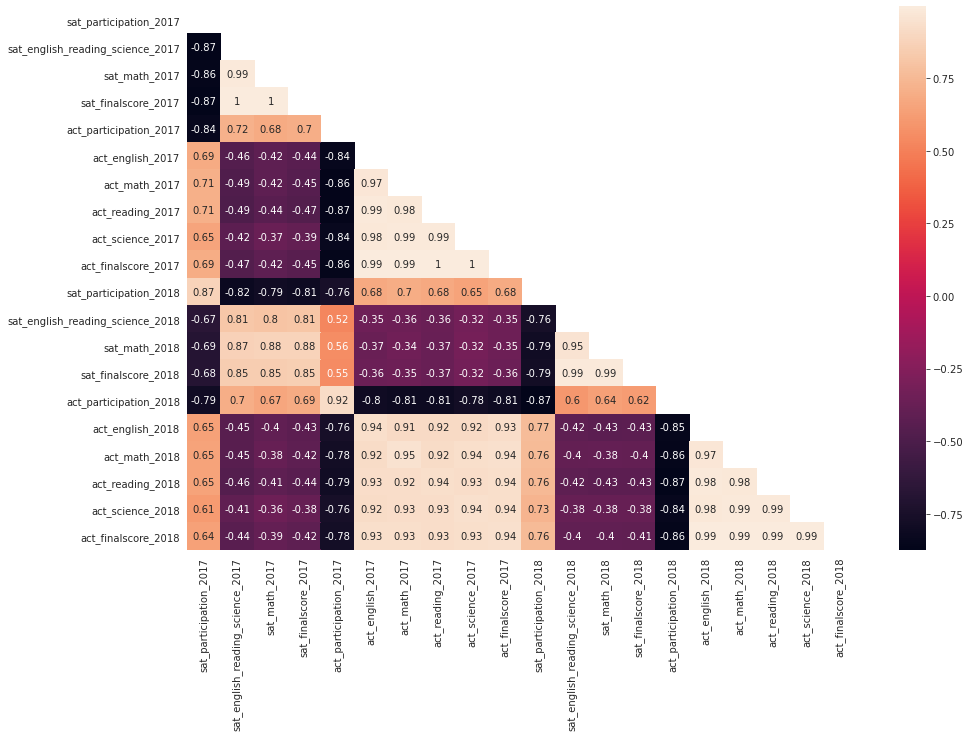

In [66]:
plt.figure(figsize=(15, 10))
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(final.corr(), mask=mask, annot=True)

As observed from the heatmap above:
- SAT participation rate for a given year has high negative correlation with ACT participation rate and SAT final score.
- SAT participation rate for 2017 has high positive correlation with SAT participation rate for 2018 
- ACT participation rate for a given year has high negative correlation with SAT participation rate and ACT final score.
- ACT participation rate for 2017 has high positive correlation with ACT participation rate for 2018


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [67]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    """Function to plot multiple histograms within a dataframe"""
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(np.median(dataframe[column]), color='r', linestyle='--', linewidth=2)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

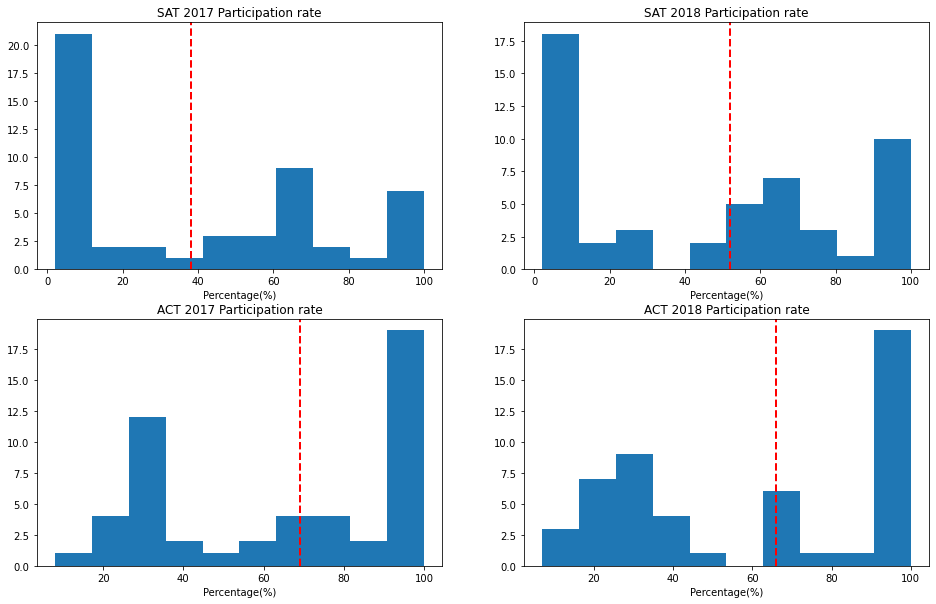

In [68]:
subplot_histograms(final, 
                   ['sat_participation_2017', 'sat_participation_2018', 'act_participation_2017', 'act_participation_2018'],
                  ['SAT 2017 Participation rate', 'SAT 2018 Participation rate', 'ACT 2017 Participation rate', 'ACT 2018 Participation rate'],
                   ['Percentage(%)', 'Percentage(%)', 'Percentage(%)', 'Percentage(%)'])

There are much more states with 90-100% participation rate for the ACT when compared to the SAT. As observed from the histograms above, there are more than 17 states with 90-100% participation rates for the ACT exams in both years. While for the SAT there are only 5 - 10 states.

For the SAT, there are much more states with 0-10% participation rate when compared to the ACT. As observed from the histograms above, there are around 17-20 states with 0-10% participation rate for the SAT in both years. As for the ACT, there are less than 3 states with 0-10% participation rate for both years. 

It is also evident that most states prefer the ACT over the SAT with the median line for ACT ranging from 60-70 while the SAT median line is ranging from 35-55. 

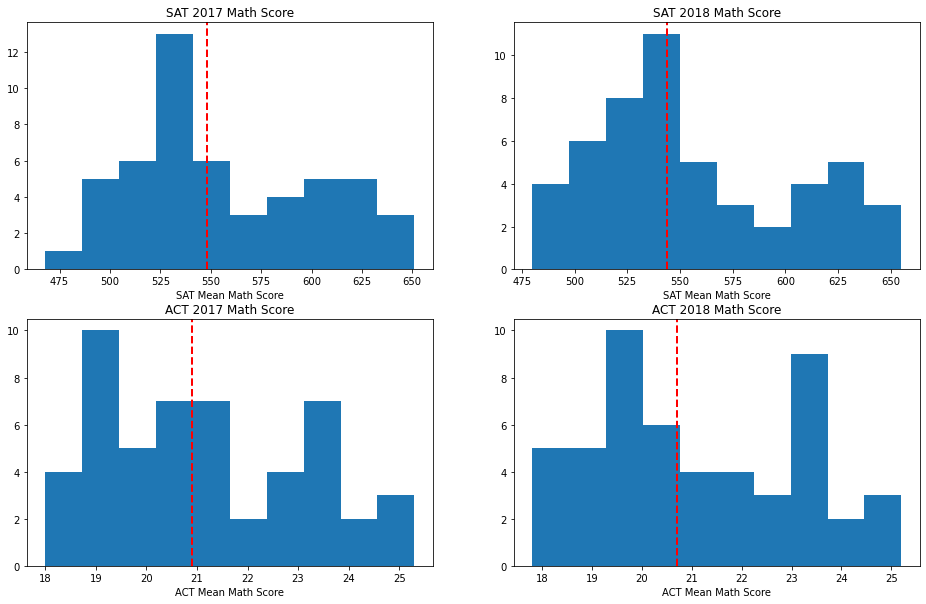

In [69]:
subplot_histograms(final, 
                   ['sat_math_2017', 'sat_math_2018', 'act_math_2017', 'act_math_2018'],
                  ['SAT 2017 Math Score', 'SAT 2018 Math Score', 'ACT 2017 Math Score', 'ACT 2018 Math Score'],
                   ['SAT Mean Math Score', 'SAT Mean Math Score', 'ACT Mean Math Score', 'ACT Mean Math Score'])

The SAT average math score for 2018 seems to have deteriorated slightly as compared to the 2017 results. As the median score for 2017 is around 549 which is higher than the median score for 2018 which is around 545.  

The ACT average math score seems to be generally the same for both years. 

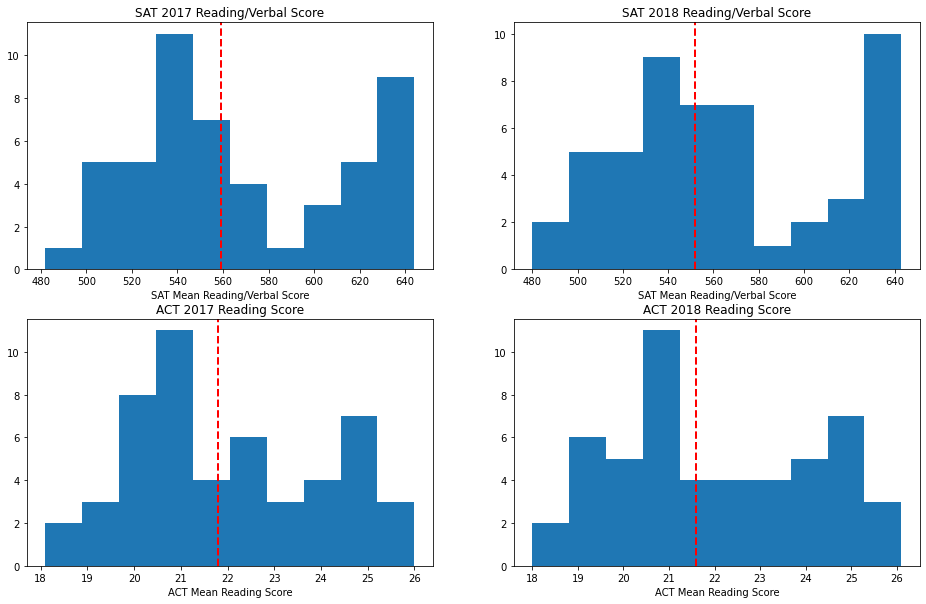

In [70]:
subplot_histograms(final, 
                   ['sat_english_reading_science_2017', 'sat_english_reading_science_2018', 'act_reading_2017', 'act_reading_2018'],
                  ['SAT 2017 Reading/Verbal Score', 'SAT 2018 Reading/Verbal Score', 'ACT 2017 Reading Score', 'ACT 2018 Reading Score'],
                   ['SAT Mean Reading/Verbal Score', 'SAT Mean Reading/Verbal Score', 'ACT Mean Reading Score', 'ACT Mean Reading Score'])

The SAT average Reading/Verbal score for 2018 seems to have deteriorated as compared to the 2017 results. As the median score for 2017 is around 560 which is higher than the median score for 2018 which is around 550.

The ACT reading/verbal score is generally the same for both years. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


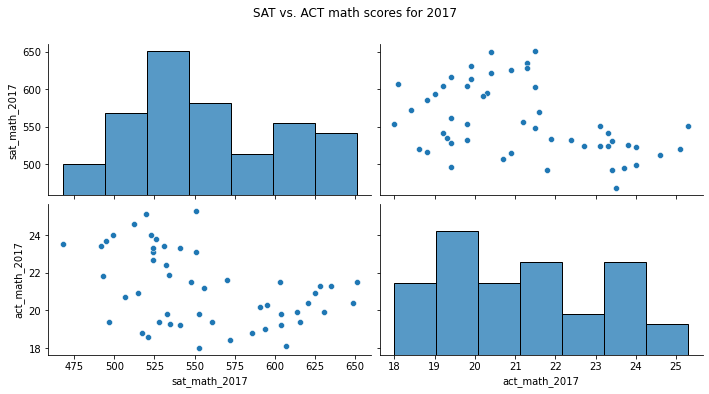

In [71]:
# Code
sns.pairplot(final, vars = ['sat_math_2017', 'act_math_2017'], height = 2.5, aspect = 2).fig.suptitle("SAT vs. ACT math scores for 2017", y=1.08);

The scatterplot shows a high average SAT math score (600 and above) is paired with a slightly lower average ACT math score (18 - 22).

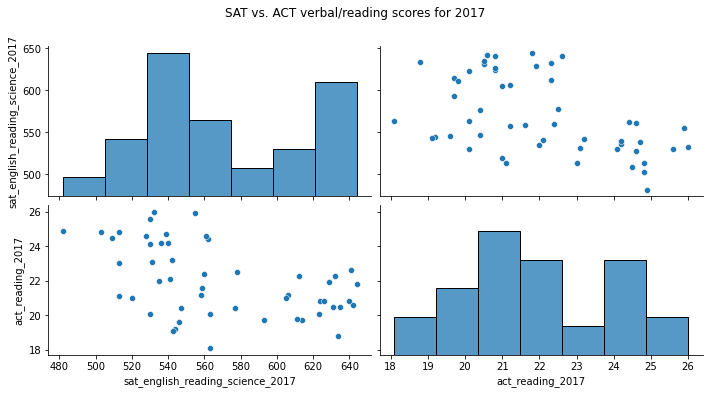

In [72]:
sns.pairplot(final, vars = ['sat_english_reading_science_2017', 'act_reading_2017'],
             height = 2.5, aspect = 2).fig.suptitle("SAT vs. ACT verbal/reading scores for 2017", y=1.08);

The scatterplot shows a high average SAT english, reading and science score (600 and above) is paired with a slightly lower average ACT reading score (18 - 22).

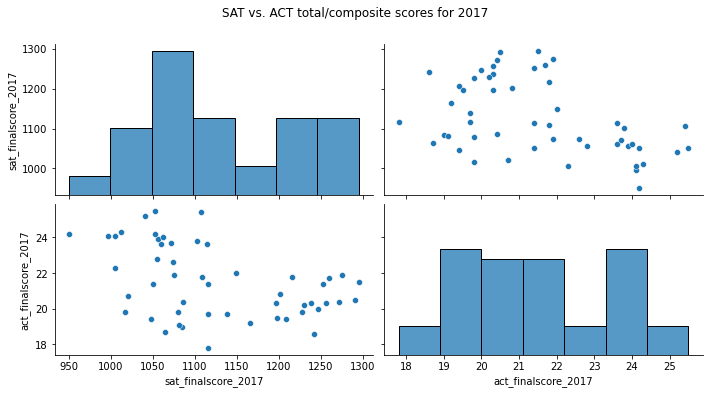

In [73]:
sns.pairplot(final, vars = ['sat_finalscore_2017', 'act_finalscore_2017'], 
             height = 2.5, aspect = 2).fig.suptitle("SAT vs. ACT total/composite scores for 2017", y=1.08);

The scatterplot shows a high average SAT final score (1200 and above) is paired with a slightly lower average ACT final score (18 - 22).

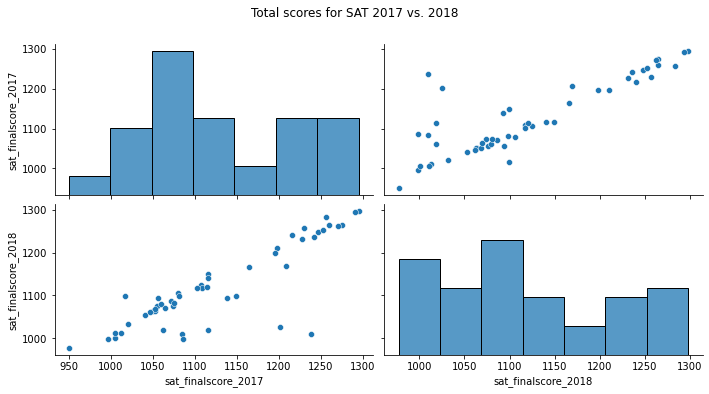

In [74]:
sns.pairplot(final, vars = ['sat_finalscore_2017', 'sat_finalscore_2018'],
             height = 2.5, aspect = 2).fig.suptitle("Total scores for SAT 2017 vs. 2018", y=1.08);

There is high positive correlation between SAT final score in 2017 and 2018 with only a few outliers.

This shows that a high SAT final score in 2017 is highly likely to result in a high SAT final score in 2018.

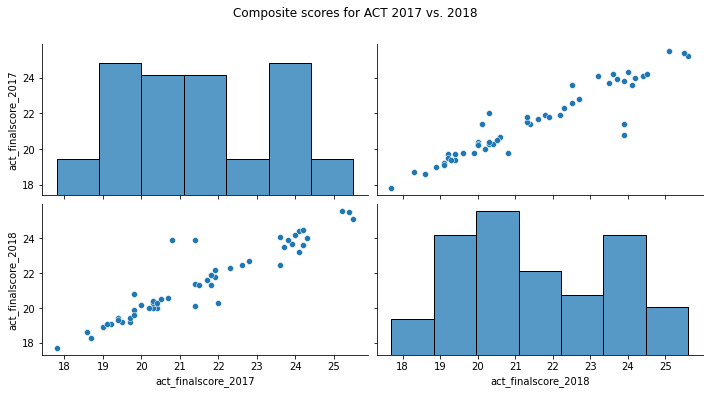

In [75]:
sns.pairplot(final, vars = ['act_finalscore_2017', 'act_finalscore_2018'],
             height = 2.5, aspect = 2).fig.suptitle("Composite scores for ACT 2017 vs. 2018", y=1.08);

There is high positive correlation between ACT composite score in 2017 and 2018 with only a few outliers.

This shows that a high ACT composite score in 2017 is highly likely to result in a high ACT composite score in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

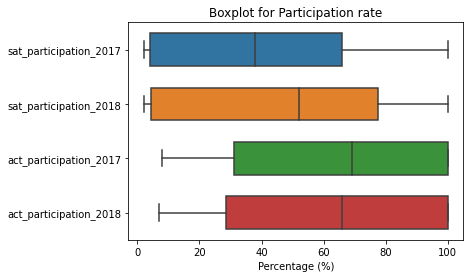

In [76]:
sns.boxplot(data=final[['sat_participation_2017', 'sat_participation_2018',
                        'act_participation_2017', 'act_participation_2018']],
            width = 0.6, orient='h').set(title = "Boxplot for Participation rate", xlabel="Percentage (%)");

The participation rate for SAT in 2017 and 2018 can be seen to be concentrated from the range 0-70% while the participation rate for ACT in 2017 and 2018 is concentrated in the 30-100% range.

This further supports the histogram that we have seen above that ACT is generally preferred in most states.

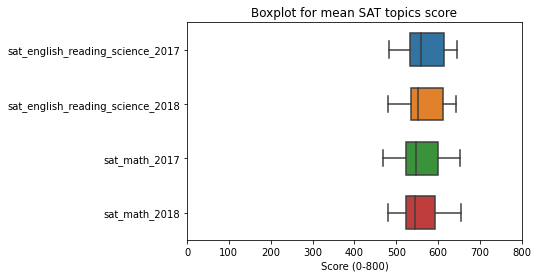

In [77]:
sns.boxplot(data=final[['sat_english_reading_science_2017', 'sat_english_reading_science_2018',
                        'sat_math_2017', 'sat_math_2018']],
            width = 0.6, orient='h').set(title = "Boxplot for mean SAT topics score", xlabel="Score (0-800)", xlim=(0,800));

The boxplot shows that there are no outliers and data errors as the minimum and maximum score for a SAT topic is 200 and 800 respectively.

It also shows that students generally score slightly higher for SAT english, reading and science topic when comparing to math.

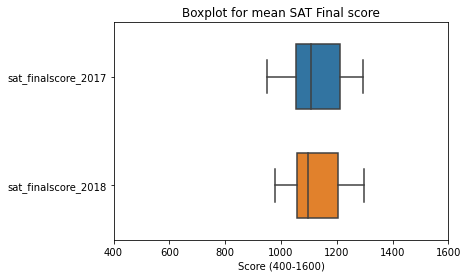

In [78]:
sns.boxplot(data=final[['sat_finalscore_2017', 'sat_finalscore_2018']],
            width = 0.6, orient='h').set(title = "Boxplot for mean SAT Final score", xlabel="Score (400-1600)", xlim=(400,1600));

The boxplot shows that there are no outliers and data errors as the minimum and maximum score for a SAT final score is 400 and 1600 respectively.

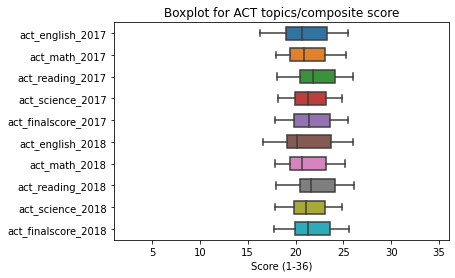

In [79]:
sns.boxplot(data=final[['act_english_2017', 'act_math_2017', 'act_reading_2017',
                        'act_science_2017', 'act_finalscore_2017','act_english_2018',
                        'act_math_2018', 'act_reading_2018', 
                        'act_science_2018','act_finalscore_2018']],
            width = 0.6, orient='h').set(title = "Boxplot for ACT topics/composite score", xlabel="Score (1-36)", xlim=(1,36));

The boxplot shows that there are no outliers and data errors as the minimum and maximum score for a ACT topic/composite score is 1 and 36 respectively.

It also shows that students generally score slightly higher for ACT reading topic than the other topics.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [80]:
# creating a seperate dataframe to visualise additional relationship

add_data = final[['state', 'sat_participation_2017', 'sat_participation_2018', 
                 'act_participation_2017', 'act_participation_2018']]

In [81]:
# adding new column to get the year-on-year change of the SAT participation rate from 2017 to 2018

add_data['sat_yoy_change'] = add_data['sat_participation_2018'] - add_data['sat_participation_2017']

<ipython-input-81-4b0c7e442ad8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_data['sat_yoy_change'] = add_data['sat_participation_2018'] - add_data['sat_participation_2017']


In [82]:
# adding new column to get the year-on-year change of the ACT participation rate from 2017 to 2018

add_data['act_yoy_change'] = add_data['act_participation_2018'] - add_data['act_participation_2017']

<ipython-input-82-fe8490b58a93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_data['act_yoy_change'] = add_data['act_participation_2018'] - add_data['act_participation_2017']


In [83]:
#visualising the top 5 states change in participation rate for SAT

add_data[['state', 'sat_yoy_change', 'act_yoy_change']].sort_values(by='sat_yoy_change', ascending=False).head(5)

,state,sat_yoy_change,act_yoy_change
13,Illinois,90,-50
5,Colorado,89,-70
39,Rhode Island,26,-6
48,West Virginia,14,-4
30,New Jersey,12,-3


In [84]:
# visualising the top 5 states change in participation rate for ACT

add_data[['state', 'act_yoy_change', 'sat_yoy_change']].sort_values(by='act_yoy_change', ascending=False).head(5)

,state,act_yoy_change,sat_yoy_change
35,Ohio,25,6
27,Nebraska,16,0
2,Arizona,4,-1
20,Maryland,3,7
37,Oregon,2,5


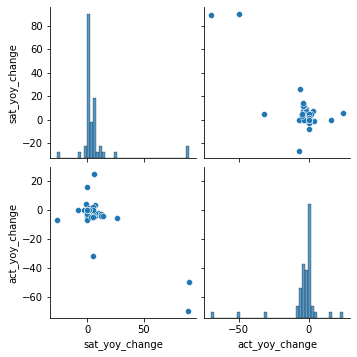

In [85]:
# creating a scatterplot to visualise the correlation between 
# the SAT and ACT year-on-year change in participation rate

sns.pairplot(add_data, vars = ['sat_yoy_change', 'act_yoy_change']);

The pairplot shows that there is not much correlation between the year on year change in participation rate of both tests. 

Except for 2 outliers that shows a high positive year on year change of 50% and above in the SAT is paired with a high negative year on year change of -40% and below in the ACT.

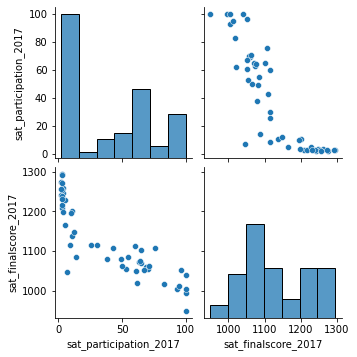

In [91]:
sns.pairplot(final, vars = ['sat_participation_2017', 'sat_finalscore_2017']);

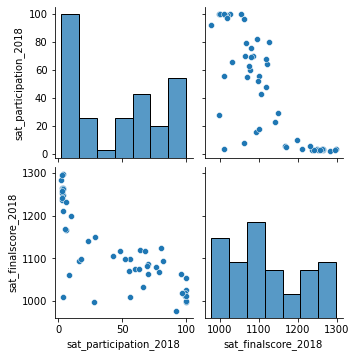

In [92]:
sns.pairplot(final, vars = ['sat_participation_2018', 'sat_finalscore_2018']);

We can see from the scatterplots that there is negative correlation between SAT participation rate and the SAT final score.
The higher the SAT participation rate, the lower the average SAT final score.

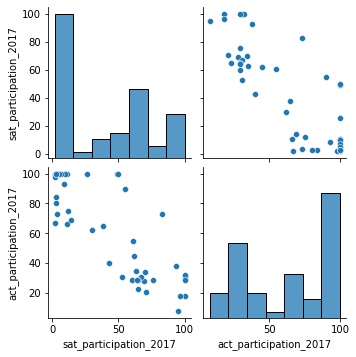

In [93]:
sns.pairplot(final, vars = ['sat_participation_2017', 'act_participation_2017']);

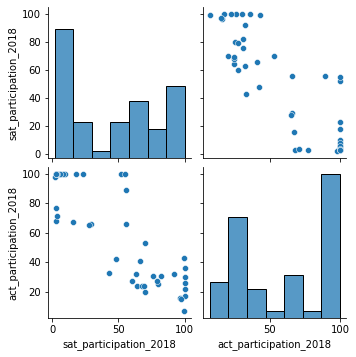

In [94]:
sns.pairplot(final, vars = ['sat_participation_2018', 'act_participation_2018']);

We can see from the scatterplots that there is negative correlation between SAT participation rate and the ACT participation rate. The higher the SAT participation rate, the lower the ACT participation rate.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
As observed from the heatmap above, we inferred that:
- SAT participation rate for a given year has high negative correlation with ACT participation rate and SAT final score.
- SAT participation rate for 2017 has high positive correlation with SAT participation rate for 2018
- ACT participation rate for a given year has high negative correlation with SAT participation rate and ACT final score.
- ACT participation rate for 2017 has high positive correlation with ACT participation rate for 2018

From the scatterplots, there is high positive correlation between SAT/ACT final score in 2017 and 2018 with only a few outliers. This shows that a high SAT/ACT final score in 2017 is highly likely to result in a high SAT/ACT final score in 2018. We also have visuals that shows negative correlation between SAT participation rate and the SAT final score. The higher the SAT participation rate, the lower the average SAT final score. Also there is negative correlation between SAT participation rate and the ACT participation rate. The higher the SAT participation rate, the lower the ACT participation rate.

From the histogram, there are much more states with 90-100% participation rate for the ACT when compared to the SAT. For the SAT, there are much more states with 0-10% participation rate when compared to the ACT. It also shows a bimodel distribution where there are 2 peaks where states have high counts of high and low participation rate. The SAT participation distribution is skewed towards the right while the ACT participation distribution is skewed towards the left. It is also evident that most states prefer the ACT over the SAT with the median line for ACT ranging from 60-70 while the SAT median line is ranging from 35-55.

From the boxplots, the participation rate for SAT in 2017 and 2018 can be seen to be concentrated from the range 0-70% while the participation rate for ACT in 2017 and 2018 is concentrated in the 30-100% range. This further supports the histogram that we have seen above that ACT is generally preferred in most states.

However in the describe table above, from 2017 to 2018, the mean for SAT participation improved from 39.80% to 45.75%. The median also imrpoved from 38% to 52%. The standard deviation for 2018 increased by a little (35.27 in 2017 and 37.31 in 2018) which shows that the participation rate variance between states got larger in 2018.  

Where as for ACT, the mean ACT participation deteriorated from 65.25% to 61.65%. The median also deteriorated from 69% to 66%. 
The standard deviation for 2018 increased by a little (32.14 in 2017 and 34.08 in 2018) which shows that the participation rate variance between states got larger in 2018.  

In conclusion, even though ACT is generally preferred in most states. We can see that from 2017 to 2018, the SAT is gaining popularity while the ACT is losing popularity. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No as it can be seen from the various histograms, that the distribution is not normally distributed. The mean, median and mode are not centered. The distributions are mostly bimodel and either skewed to the left or right. 

Does This Assumption Hold for:
   - Math
   - Reading
   - Rates

Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 

The Math score histogram is bimodel and skewed towards the right. It is not normally distributed. The mean will be greater than the median and the median greater than the mode. (Mean>Median>Mode)

The Reading score histogram is bimodel and skewed towards the right. It is not normally distributed. The mean will be greater than the median and the median greater than the mode. (Mean>Median>Mode)

The Participation rate histogram shows a bimodel distribution where there are 2 peaks where states have high counts of high and low participation rate. The SAT distribution is skewed towards the right while the ACT distribution is skewed towards the left. It is not normally distributed. 
For the SAT distribution, the mean will be greater than the median and the median greater than the mode. (Mean>Median>Mode)
While for the ACT distribution, the mean will be lesser than the median and the median lesser than the mode. (Mean<Median<Mode)

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Yes but only to a certain extent. We will only be able to conclude if there is a correlation between SAT/ACT participation rates with the score results. We will not be able to interpret a deeper understanding of the relationship. 
If we want to get a more effective understanding of the relationship, we will need more data such as Current budget from Government supporting Schools, ratio of State population with Number of schools in state or if there are policies enforcing the test to be compulsory.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
No as the topics and question difficulty will be different. The scores are also determined by it's own bell curve based on the students participating in the exams.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

For a 95% confidence interval test, significance level of 0.05:
- H0: The mean ACT participation rate in 2017 does not affect the mean SAT participation rate in 2017
- HA: The mean ACT participation rate in 2017 affects the mean SAT participation rate in 2017

P value is the probability of the DATA given H0 is true (The mean ACT participation rate in 2017 does not affect the mean SAT participation rate in 2017)

In [87]:
mean1 = 39.80 #average participation rate of SAT 2017
std1 = 35.28 # standard deviation of participation rate of SAT 2017
nobs1 = 51 #number of observations = 51
mean2 = 65.25 #average participation rate of ACT 2017
std2 = 32.14 # standard deviation of participation rate of ACT 2017
nobs2 = 51 #number of observations = 51

In [88]:
# conduct the t-test with the variables from above

stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2,
                           equal_var=True, alternative ='two-sided')

Ttest_indResult(statistic=-3.8082777729188195, pvalue=0.00024159770685115145)

P value is < 0.05 we reject H0 and accept the HA which states the mean ACT participation rate in 2017 affects the mean SAT participation rate in 2017.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The 3 states are chose for the following reasons:
- **South Carolina(SA)** - SAT participation improved 5% even with 100% participation rate for ACT for both years
- **District of Columbia(DC)** - SAT participation dropped from 100% to 92%
- **Colorado** - ACT participation rate dropped from 100% to 30% while SAT participation rose from 11% to 100%

[States that require SAT/ACT](https://www.testive.com/state-sat-act/)

We found out that ACT is a requirement in SA which explains the 100% participation in ACT for both years. Also the 
SAT is gaining popularity as students in SA are choosing to take the test. However according to the article, the overall state SAT score dropped 43 points as more students choose to take the SAT. [SAT scores drop as SA choose to take test](https://www.greenvilleonline.com/story/news/education/2019/09/24/sat-scores-drop-more-sc-students-take-sat-standardized-test/2427143001/)

For DC, SAT is a requirement which explains the 100% participation rate in 2017. The participation rate dropped as it was no longer mandatory to take the SAT exams in 2018. However participation rate still remained high as SAT is offered for free to all juniors and seniors. [SAT in DC no longer mandatory](https://blog.prepscholar.com/which-states-require-the-sat)

For Colorado, the participation rate for SAT rose from 11% to 100% was because it was mandatory to take the SAT on Apr 11th 2017. Which explains the drastic drop for the ACT participation rate. [Colorado Changed to the SAT in 2017](https://www.testive.com/colorado-sat-change-2017/)






## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

We have come to a conclusion that states generally prefer ACT over the SAT with more states prefering to make ACT mandatory over SAT (Much more states with 100% participation in ACT over the SAT). However the SAT participation rate is slowly increasing as it starts to gain popularity. 

We also concluded that SAT participation rate is negatively correlated with ACT participation rate and SAT average final score. Hence states with increased SAT participation will likely see lower ACT participation and SAT average final score. 

Additional data that will be helpful in our investigations would be current budget from the Government supporting Schools and ratio of State population with Number of schools in state.

The state we will be choosing is Iowa as it has low SAT participation of 3% in 2018 and ACT participation in the state is not mandatory (68% in 2018). It currently has a SAT average final score of 1265 in 2018 which is likely to deteriorate as SAT participation rate increases in the future. Some ways to increase the SAT participation rate in Iowa would be to offer free or subsidised cost for taking the SAT and do up a comparison between the SAT and ACT to encourage students that might do better in the SAT to participate.